In [1]:
import joblib
import click
import json
import time
import os
import itertools
import collections.abc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pennylane as qml
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
# from qiskit_ibm_provider import IBMProvider

from quantum.Evaluate import evaluate
from settings import ANSATZ_LIST, ENCODER_LIST
from quantum.Quantum import QuantumRegressor

os.environ["OMP_NUM_THREADS"] = "12"

wires None
wires2 None
wires None
wires2 None
wires None
wires2 None
wires None
wires2 None


In [2]:
# Global variables
OPTIMIZER = None
SHOTS = None
X_DIM = None
BACKEND = None
DEVICE = None
SCALE_FACTORS = None
ANSATZ = None
ENCODER = None
POSTPROCESS = None
ERROR_MITIGATION = None
LAYERS = None
TOKEN = None
HYPERPARAMETERS = None
RE_UPLOAD_DEPTH = None
MAX_ITER = None
TOLERANCE = None
NUM_QUBITS = None
BATCH_SIZE = None
NUM_CORES = None
############################################
# Utility functions
############################################


def parse_settings(settings_file):
    with open(settings_file, 'r') as fp:
        settings = json.load(fp)

    global OPTIMIZER
    OPTIMIZER = settings['OPTIMIZER']

    global SHOTS
    SHOTS = settings['SHOTS']
                
    global BACKEND
    BACKEND = settings['BACKEND']

    global DEVICE
    DEVICE = settings['DEVICE']

    global SCALE_FACTORS
    SCALE_FACTORS = settings['SCALE_FACTORS']

    global POSTPROCESS
    POSTPROCESS = settings['POSTPROCESS']

    global ERROR_MITIGATION
    ERROR_MITIGATION = settings['ERROR_MITIGATION']

    global LAYERS
    LAYERS = settings['LAYERS']

    global HYPERPARAMETERS
    HYPERPARAMETERS = settings['HYPERPARAMETERS']
    # f was removed from HYPERPARAMETERS, this ensures old settings files can still run.
    if 'f' in HYPERPARAMETERS.keys():
        _ = HYPERPARAMETERS.pop('f', None)

    global RE_UPLOAD_DEPTH
    RE_UPLOAD_DEPTH = settings['RE-UPLOAD_DEPTH']

    global MAX_ITER
    MAX_ITER = settings['MAX_ITER']

    global TOLERANCE
    try:
        TOLERANCE = settings['TOLERANCE']
    except KeyError:
        TOLERANCE = None

    global NUM_QUBITS
    try:
        NUM_QUBITS = settings['NUM_QUBITS']
    except KeyError:
        NUM_QUBITS = None

    # classes aren't JSON serializable, so we store the key in the settings file and access it here.
    global ANSATZ
    ANSATZ = ANSATZ_LIST[settings['ANSATZ']]

    global ENCODER
    ENCODER = ENCODER_LIST[settings['ENCODER']]

    global BATCH_SIZE
    BATCH_SIZE = settings['BATCH_SIZE']
    
    global NUM_CORES
    NUM_CORES = settings['NUM_CORES']

def load_dataset(file):
    print(f'Loading dataset from {file}... ')
    data = joblib.load(file)
    X = data['X']
    y = data['y']

    global X_DIM
    _, X_DIM = X.shape
    print(f'Successfully loaded {file} into X and y data. ')
    return X, y


In [3]:
def create_kwargs():
    #  First have to apply specific ansatz settings: setting number of layers and the number of wires based on features
    ANSATZ.layers = LAYERS
    ANSATZ.set_wires(range(X_DIM))

    kwargs = {
        'encoder': ENCODER,
        'variational': ANSATZ,
        'num_qubits': X_DIM,
        'optimizer': OPTIMIZER,
        # 'optimizer': "BFGS",
        'max_iterations': MAX_ITER,
        'tol': TOLERANCE,
        'device': DEVICE,
        'shots': SHOTS,
        'backend': BACKEND,
        'postprocess': POSTPROCESS,
        'error_mitigation': ERROR_MITIGATION,
        'token': TOKEN,
        're_upload_depth': RE_UPLOAD_DEPTH,
        'batch_size': BATCH_SIZE,
        'njobs':NUM_CORES
    }
    return kwargs

In [4]:
settings="./M_Full-CRX/M_Full-CRX.json"
# settings="./IQP_Full-Pauli-CRZ/IQP_Full-Pauli-CRZ.json"
train_set="./linear_train.bin"
test_set="./linear_test.bin"
scaler="./linear_scaler.bin"

In [5]:
X_train, y_train = load_dataset(train_set)
parse_settings(settings)
if DEVICE == 'qiskit.ibmq':
    save_token(instance, token)

global NUM_QUBITS
global X_DIM
if NUM_QUBITS is not None:
    X_DIM = NUM_QUBITS
elif X_DIM == 1:  # if X_DIM is None and num_qubits wasn't specified anywhere use a default value of 2.
    NUM_QUBITS = 2
    X_DIM = NUM_QUBITS

kwargs = create_kwargs()
title=False
if title is None:
    title = os.path.basename(settings)
    title, _ = os.path.splitext(title)



if test_set is not None:
    X_test, y_test = load_dataset(test_set)
else:
    X_test, y_test = None, None

scaler = joblib.load(scaler)

Loading dataset from ./linear_train.bin... 
Successfully loaded ./linear_train.bin into X and y data. 
wires4 range(0, 5)
wires4 range(0, 5)
Loading dataset from ./linear_test.bin... 
Successfully loaded ./linear_test.bin into X and y data. 


/Users/grierjones/miniconda3/envs/simple_qml/lib/python3.12/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.3.0 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [6]:
# from quantum.circuits.Ansatz import TwoLocal, EfficientSU2
num_qubits = 5
wires = range(num_qubits)
device = qml.device('qulacs.simulator', wires=num_qubits)


In [7]:
from qiskit.circuit.library import n_local
# entanglement = []
# for i in wires:
#     for j in wires:
#         if i != j:
#             entanglement.append((i, j))
# qc = n_local.TwoLocal(num_qubits=5, 
#                       entanglement=entanglement, 
#                       reps=1,
#                       rotation_blocks=['rx', 'rz'], 
#                       entanglement_blocks=['crx'],
#                       skip_final_rotation_layer=True)
# numparams = qc.num_parameters_settable
# qc = qc.decompose()
# qc = qc.assign_parameters(np.arange(numparams))
# qml_circuit = qml.from_qiskit(qc)
# # qml_circuit(wires=wires)
# qml.draw_mpl(qml_circuit)()

In [8]:


class TwoLocal:

    def __init__(self,
                 wires: list = None,
                 entanglement: str = 'linear',
                 reps: int = 1,
                 rot_gates: list = None,
                 entangle_gates: list = None,
                 skip_final_rot: bool = True
                 ):
        self._entanglement = entanglement
        self._reps = reps
        self._rot_gates = rot_gates
        self._entangle_gates = entangle_gates
        self._skip_final_rot = skip_final_rot
        self._wires = None
        self._qc = None
        print('pre-set_wires',self._wires)
        if wires is not None:
            self.set_wires(wires)
        print('post-set_wires',self._qc.decompose())
        
    def __call__(self, parameters):
        # if wires is not None:
        #     if len(self._wires) != len(wires):
        #         raise ValueError("Cannot override wires instance of different length")
        #     self._wires = wires
        #     print(self._wires)
            
        
        if self._qc.num_parameters_settable != len(parameters):
            raise ValueError("Incorrect number of parameters. Expected ", qc.num_parameters_settable, "but received ",
                             len(parameters))

        
        qc = self._qc.decompose()
        parameters = parameters.tolist()
        qc = qc.assign_parameters(parameters)
        qml_circuit = qml.from_qiskit(qc)
        print('__call__',self._wires)
        qml_circuit(wires=self._wires)
        

    @property
    def num_params(self):
        return self._qc.num_parameters_settable

    @property
    def layers(self):
        return self._reps

    @layers.setter
    def layers(self, val):
        self._reps = val

    def set_wires(self, wires):
        self._wires = wires
        print(self._wires)
        if self._entanglement == 'complete':
            entanglement = []
            for i in wires:
                for j in wires:
                    if i != j:
                        entanglement.append((i, j))
            self._entanglement = entanglement
        self._qc = n_local.TwoLocal(num_qubits=len(self._wires), entanglement=self._entanglement, reps=self._reps,
                                    rotation_blocks=self._rot_gates, entanglement_blocks=self._entangle_gates,
                                    skip_final_rotation_layer=self._skip_final_rot)
        



In [9]:

# variational = EfficientSU2(wires=wires,su2_gates=['ry', 'rz'],entanglement='linear',reps=1,skip_final_rot=True)
variational = TwoLocal(wires=wires,rot_gates=['rx', 'rz'], entangle_gates=['crx'], entanglement='complete')
LAYERS=1
re_upload_depth=1

variational.layers = LAYERS
num_params = variational.num_params * re_upload_depth
generator = np.random.default_rng(12958234)
initial_parameters = generator.uniform(-np.pi, np.pi, num_params)
feat = generator.uniform(-1, 1, num_qubits)

pre-set_wires None
range(0, 5)
post-set_wires      ┌──────────┐┌──────────┐                                       »
q_0: ┤ Rx(θ[0]) ├┤ Rz(θ[5]) ├──────■────────────■────────────■──────»
     ├──────────┤├──────────┤┌─────┴─────┐      │            │      »
q_1: ┤ Rx(θ[1]) ├┤ Rz(θ[6]) ├┤ Rx(θ[10]) ├──────┼────────────┼──────»
     ├──────────┤├──────────┤└───────────┘┌─────┴─────┐      │      »
q_2: ┤ Rx(θ[2]) ├┤ Rz(θ[7]) ├─────────────┤ Rx(θ[11]) ├──────┼──────»
     ├──────────┤├──────────┤             └───────────┘┌─────┴─────┐»
q_3: ┤ Rx(θ[3]) ├┤ Rz(θ[8]) ├──────────────────────────┤ Rx(θ[12]) ├»
     ├──────────┤├──────────┤                          └───────────┘»
q_4: ┤ Rx(θ[4]) ├┤ Rz(θ[9]) ├───────────────────────────────────────»
     └──────────┘└──────────┘                                       »
«                  ┌───────────┐                          ┌───────────┐»
«q_0: ──────■──────┤ Rx(θ[14]) ├──────────────────────────┤ Rx(θ[18]) ├»
«           │      └─────┬─────┘      

In [10]:
try:
    variational(initial_parameters)
except:
    variational(initial_parameters)

__call__ range(0, 5)


__call__ range(0, 5)


(<Figure size 2500x600 with 1 Axes>, <Axes: >)

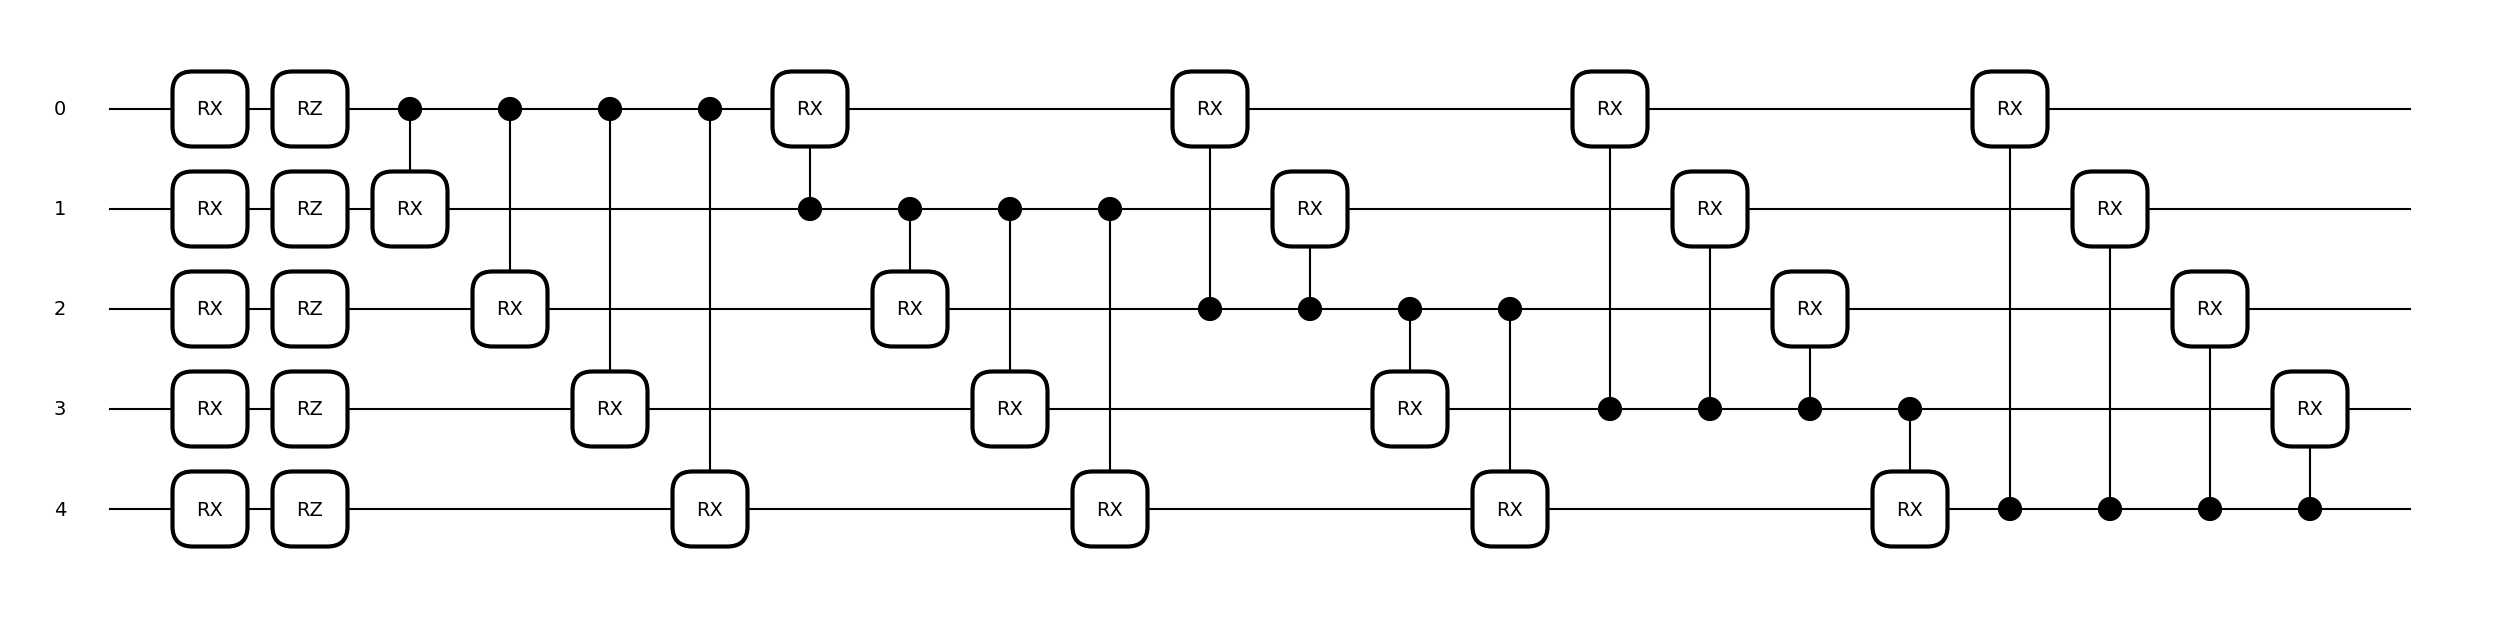

In [11]:
qml.draw_mpl(variational)(initial_parameters)

In [ ]:
variational.layers = LAYERS
variational.set_wires(wires)

num_params = variational.num_params * re_upload_depth
generator = np.random.default_rng(12958234)
initial_parameters = generator.uniform(-np.pi, np.pi, num_params)
feat = generator.uniform(-1, 1, num_qubits)

def circuit(parameters, wires):
    variational(parameters=parameters, wires=wires)
    return  qml.expval(qml.PauliZ(0))

qnode = qml.QNode(circuit,device)
# qml.draw_mpl(qnode)(initial_parameters, wires)
qnode(initial_parameters,wires)

In [ ]:
# model = QuantumRegressor(**kwargs)
# model.fit(X_train, y_train)

In [ ]:
# plt.scatter(model.predict(X_train),y_train)
# plt.scatter(model.predict(X_test),y_test)
# plt.scatter(X_train,y_train)